# Load TensorFlow 2.x in a Colab project.

In [1]:
%tensorflow_version 2.x

Import required libraries

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Set up data

In [3]:
number_of_datapoints = 1000
# generate random x values in the range -5 to +5
x = np.random.uniform(low = -5 , high = 5 , size = (number_of_datapoints, 1))
# generate random y values in the range -5 to +5
y = np.random.uniform(-5 , 5 , size = (number_of_datapoints , 1))
# generate some random error in the range -1 to +1
noise = np.random.uniform(low =-1 , high =1, size = (number_of_datapoints, 1))
z = 7 * x + 6 * y + 5 + noise

Print x, y and z sample values for manual verification

In [4]:
x[:5,:].round(2)

array([[-3.08],
       [-3.63],
       [ 4.63],
       [-0.63],
       [ 4.14]])

In [5]:
y[:2,:].round(2)

array([[ 1.31],
       [-2.5 ]])

In [6]:
z[:2,:].round(2)

array([[ -8.64],
       [-34.84]])

Stack x and y arrays for inputting to neural network

In [7]:
input = np.column_stack((x,y))

Print few values of input array for demonstration purpose.

In [8]:
input[:2,:].round(2)

array([[-3.08,  1.31],
       [-3.63, -2.5 ]])

Create a Keras sequential model consisting of single layer with a single neuron.

In [9]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1)])

Compile the model with the spcified optimizier, loss function and error metrics. 

In [10]:
model.compile(optimizer = 'sgd' , loss = 'mean_squared_error' , metrics = ['mse'] )

Train the model. The first parameter specifies the input, the second specifies the corresponding target values. The epochs defines the number of iterations in training. The validation split specifies what percentage of input data would be used for validating the model. The callbacks parameter specifies the variable were the collected statistics would be accumulated.

Import History module to record loss and accuracy on each epoch during training

In [11]:
from tensorflow.keras.callbacks import History 
history = History()

In [12]:
model.fit(input, z , epochs = 15 , verbose = 1, validation_split=0.2, callbacks=[history])

Epoch 1/15
25/25 [==============================] - 0s 6ms/step - loss: 77.8774 - mse: 77.8774 - val_loss: 11.0238 - val_mse: 11.0238
Epoch 2/15
25/25 [==============================] - 0s 2ms/step - loss: 7.0934 - mse: 7.0934 - val_loss: 4.2090 - val_mse: 4.2090
Epoch 3/15
25/25 [==============================] - 0s 2ms/step - loss: 2.8078 - mse: 2.8078 - val_loss: 1.7563 - val_mse: 1.7563
Epoch 4/15
25/25 [==============================] - 0s 2ms/step - loss: 1.2426 - mse: 1.2426 - val_loss: 0.8503 - val_mse: 0.8503
Epoch 5/15
25/25 [==============================] - 0s 2ms/step - loss: 0.6660 - mse: 0.6660 - val_loss: 0.5082 - val_mse: 0.5082
Epoch 6/15
25/25 [==============================] - 0s 2ms/step - loss: 0.4558 - mse: 0.4558 - val_loss: 0.3804 - val_mse: 0.3804
Epoch 7/15
25/25 [==============================] - 0s 2ms/step - loss: 0.3758 - mse: 0.3758 - val_loss: 0.3302 - val_mse: 0.3302
Epoch 8/15
25/25 [==============================] - 0s 2ms/step - loss: 0.3474 - mse: 

Print keys in the history just to know their names. These will be used for plotting the metrics.

In [13]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


Plot the loss metric on both training and validation datasets.

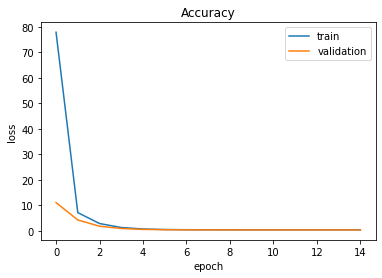

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Plot the mean squared error on both training and validation datasets.

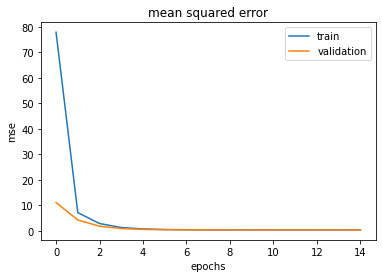

In [15]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('mean squared error')
plt.ylabel('mse')
plt.xlabel('epochs')
plt.legend(['train' , 'validation'] , loc = 'upper right')
plt.show()

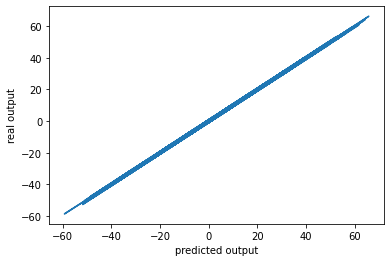

In [16]:
plt.plot(np.squeeze(model.predict_on_batch(input)), np.squeeze(z))
plt.xlabel('predicted output')
plt.ylabel('real output')
plt.show()

In [17]:
print("Predicted z for x=2, y=3 ---> ", model.predict([[2,3]]).round(2))

Predicted z for x=2, y=3 --->  [[37.08]]


In [18]:
#checking from equation 
#z = 7*x + 6*y + 5
print("Expected output: ", 7*2 + 6*3 + 5)

Expected output:  37
